In [1]:
from IPython.display import Image

# LionBase Open Laptop Test

Welcome to the LionBase Open Laptop Test! You will have 8 hours to complete this test. Once submitted, the Exec Team will schedule a time for you to present your deliverable. 

This test is open-ended, however we want you to approach this as though you are doing this for a real client. If your work and presentation is exemplary, you will have the opportunity to interview for a spot in the LionBase Freelancer Network.

You may ask questions for clarification, however you cannot ask for a video call or for help on the code. Otherwise, the test is completely open! You are encouraged to use all the resources you have available to you -- the LionBase Education Modules, Google, etc.

## Problem

MedX has developed a new drug that can help treat cancer. However, they can only produce the drug at a limited rate. They would like you to develop a <span style="color:red">**linear regression model**</span> that can predict the death rate from cancer in a given U.S. county to help them prioritize distribution. The people you are interfacing with are not technical.

## The Data

MedX has provided you a dataset called ```cancer_data.csv``` which contains data from cancer.gov, clinicaltrials.gov, and the American Community Survey.

Each row represents a different county in the United States.

### Data Dictionary
- **TARGET_deathRate:** Dependent variable. Mean per capita (100,000) cancer mortalities(a)
- **avgAnnCount:** Mean number of reported cases of cancer diagnosed annually(a)
- **avgDeathsPerYear:** Mean number of reported mortalities due to cancer(a)
- **incidenceRate:** Mean per capita (100,000) cancer diagoses(a)
- **medianIncome:** Median income per county (b)
- **popEst2015:** Population of county (b)
- **povertyPercent:** Percent of populace in poverty (b)
- **studyPerCap:** Per capita number of cancer-related clinical trials per county (a)
- **binnedInc:** Median income per capita binned by decile (b)
- **MedianAge:** Median age of county residents (b)
- **MedianAgeMale:** Median age of male county residents (b)
- **MedianAgeFemale:** Median age of female county residents (b)
- **Geography:** County name (b)
- **AvgHouseholdSize:** Mean household size of county (b)
- **PercentMarried:** Percent of county residents who are married (b)
- **PctNoHS18_24:** Percent of county residents ages 18-24 highest education attained: less than high school (b)
- **PctHS18_24:** Percent of county residents ages 18-24 highest education attained: high school diploma (b)
- **PctSomeCol18_24:** Percent of county residents ages 18-24 highest education attained: some college (b)
- **PctBachDeg18_24:** Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)
- **PctHS25_Over:** Percent of county residents ages 25 and over highest education attained: high school diploma (b)
- **PctBachDeg25_Over:** Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)
- **PctEmployed16_Over:** Percent of county residents ages 16 and over employed (b)
- **PctUnemployed16_Over:** Percent of county residents ages 16 and over unemployed (b)
- **PctPrivateCoverage:** Percent of county residents with private health coverage (b)
- **PctPrivateCoverageAlone:** Percent of county residents with private health coverage alone (no public assistance) (b)
- **PctEmpPrivCoverage:** Percent of county residents with employee-provided private health coverage (b)
- **PctPublicCoverage:** Percent of county residents with government-provided health coverage (b)
- **PctPubliceCoverageAlone:** Percent of county residents with government-provided health coverage alone (b)
- **PctWhite:** Percent of county residents who identify as White (b)
- **PctBlack:** Percent of county residents who identify as Black (b)
- **PctAsian:** Percent of county residents who identify as Asian (b)
- **PctOtherRace:** Percent of county residents who identify in a category which is not White, Black, or Asian (b)
- **PctMarriedHouseholds:** Percent of married households (b)
- **BirthRate:** Number of live births relative to number of women in county (b)

(a): years 2010-2016

(b): 2013 Census Estimates

## Submission
For this test, you must submit:
- Your code (as a .ipynb)
- A report describing your model, visualizations, insights, and recommendations (as a .pdf)

Email your submission to certificate@lionbase.nyc.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from matplotlib import pyplot
from numpy import where
from imblearn.over_sampling import SMOTE
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
import seaborn as sns

In [20]:
df = pd.read_csv("cancer_data_update.csv", index_col = 0)

In [10]:
df.head()

,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
avgAnnCount,,,,,,,,,,,,,,,,,,,,,
1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [12]:
df.shape

(3047, 33)

In [13]:
df.describe()

,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,42.145323,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,5.292849,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,39.100000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,42.400000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,45.300000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,65.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [14]:
df.isnull().values.any()

True

In [15]:
df = df.dropna(axis = 0)

In [16]:
df.shape

(591, 33)

It is a little concerning that going through the data if you remove null values you lose so many data points.  So i am going to investigate what values are coming out as null.

In [35]:
df = pd.read_csv("cancer_data_update.csv", index_col = 0)

In [23]:
titles = ['avgDeathsPerYear','TARGET_deathRate','incidenceRate','medIncome','popEst2015','povertyPercent',
          'studyPerCap','MedianAge','MedianAgeMale', 'MedianAgeFemale','Geography','AvgHouseholdSize',
          'PercentMarried','PctNoHS18_24','PctHS18_24','PctSomeCol18_24' ,'PctBachDeg18_24','PctHS25_Over',
          'PctBachDeg25_Over','PctEmployed16_Over','PctUnemployed16_Over', 'PctPrivateCoverage','PctPrivateCoverageAlone','PctEmpPrivCoverage',
          'PctPublicCoverage','PctPublicCoverageAlone','PctWhite','PctBlack','PctAsian','PctOtherRace',
          'PctMarriedHouseholds','BirthRate'
]

In [28]:
for i in titles:
    print(i, df[i].isnull().sum().sum())

avgDeathsPerYear 0
TARGET_deathRate 0
incidenceRate 0
medIncome 0
popEst2015 0
povertyPercent 0
studyPerCap 0
MedianAge 0
MedianAgeMale 0
MedianAgeFemale 0
Geography 0
AvgHouseholdSize 0
PercentMarried 0
PctNoHS18_24 0
PctHS18_24 0
PctSomeCol18_24 2285
PctBachDeg18_24 0
PctHS25_Over 0
PctBachDeg25_Over 0
PctEmployed16_Over 152
PctUnemployed16_Over 0
PctPrivateCoverage 0
PctPrivateCoverageAlone 609
PctEmpPrivCoverage 0
PctPublicCoverage 0
PctPublicCoverageAlone 0
PctWhite 0
PctBlack 0
PctAsian 0
PctOtherRace 0
PctMarriedHouseholds 0
BirthRate 0


This is a good sign.  The majority of the data is present we just having null/missing values in a 3 categories.  While you can make an argument that all 3 categories could have an effect, there are still 28 other categories to perform a regression with.  On top of that, in this situation it would not make any sense to replace the missing values with dummy values.

In [19]:
df.loc[df['avgDeathsPerYear'] == 14010.000000]

,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
avgAnnCount,,,,,,,,,,,,,,,,,,,,,
38150.0,14010,148.4,405.5,55686,10170292,18.7,255.941521,"(54545.6, 61494.5]",35.6,34.4,...,47.4,39.7,32.9,23.0,53.25871,8.27614,14.12938,19.591522,44.58165,4.705281


The value above seemed to be a potential outlier.  And a closer look had me questioning a county population of 10 million, but I did a quick google and this is and most likely LA county.

Now, knowing a lot more about the data I can move on to some actual analysis of it.  I will be removing the three aformentioned categories along with Geography because it is a categorical value.

In [36]:
y = df[df.columns[1]].values
y #dependent variable 

array([164.9, 161.3, 174.7, ..., 153.9, 175. , 213.6])

In [37]:
selected_columns = ['avgDeathsPerYear','incidenceRate','medIncome','popEst2015','povertyPercent',
          'studyPerCap','MedianAge','MedianAgeMale', 'MedianAgeFemale','AvgHouseholdSize',
          'PercentMarried','PctNoHS18_24','PctHS18_24','PctBachDeg18_24','PctHS25_Over',
          'PctBachDeg25_Over','PctUnemployed16_Over','PctPrivateCoverage','PctEmpPrivCoverage',
          'PctPublicCoverage','PctPublicCoverageAlone','PctWhite','PctBlack','PctAsian','PctOtherRace',
          'PctMarriedHouseholds','BirthRate']
df = df[selected_columns]

In [38]:
X = df.values
X

array([[4.69000000e+02, 4.89800000e+02, 6.18980000e+04, ...,
        1.84347853e+00, 5.28560759e+01, 6.11883103e+00],
       [7.00000000e+01, 4.11600000e+02, 4.81270000e+04, ...,
        3.74135153e+00, 4.53725004e+01, 4.33309558e+00],
       [5.00000000e+01, 3.49700000e+02, 4.93480000e+04, ...,
        2.74735831e+00, 5.44448684e+01, 3.72948782e+00],
       ...,
       [4.60000000e+01, 4.53549422e+02, 5.11440000e+04, ...,
        5.68070519e+00, 5.51539491e+01, 7.80919168e+00],
       [5.20000000e+01, 4.53549422e+02, 5.07450000e+04, ...,
        2.13179047e+00, 5.84842319e+01, 7.58293839e+00],
       [4.80000000e+01, 4.53549422e+02, 4.11930000e+04, ...,
        1.35645744e+00, 5.60402421e+01, 8.98172324e+00]])

In [39]:
X.shape

(3047, 27)

In [46]:
model = sm.OLS(y, X).fit() # this is saying to fit an ordinary least squares model to the data
model.summary() # output statistics

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              9409.
Date:                Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                        16:16:28   Log-Likelihood:                         -13390.
No. Observations:                3047   AIC:                                  2.683e+04
Df Residuals:                    3020   BIC:                                  2.700e+04
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0118      0.004      3.263      0.001       0.005       0.019
x2             0.2004      0.007     27.605      0.000       0.186       0.215
x3             0.0002   8.04e-05      3.041      0.002    8.68e-05       0.000
x4         -1.978e-05   5.53e-06     -3.577      0.000   -3.06e-05   -8.94e-06
x5             1.4047      0.132     10.642      0.000       1.146       1.664
x6            -0.0002      0.001     -0.347      0.729      -0.002       0.001
x7            -0.0018      0.008     -0.227      0.820      -0.017       0.014
x8            -0.4049      0.212     -1.912      0.056      -0.820       0.010
x9             0.1879      0.218      0.863      0.388      -0.239       0.615
x10            2.7588      0.943      2.926      0.003       0.910       4.608
x11            1.0802      0.147      7.369      0.000       0.793       1.368
x12           -0.0278      0.056     -0.499      0.618      -0.137       0.082
x13            0.2939      0.050      5.906      0.000       0.196       0.391
x14           -0.1521      0.110     -1.381      0.167      -0.368       0.064
x15            0.6328      0.095      6.649      0.000       0.446       0.819
x16           -0.7870      0.149     -5.268      0.000      -1.080      -0.494
x17            0.6130      0.162      3.793      0.000       0.296       0.930
x18           -0.0100      0.120     -0.083      0.934      -0.245       0.225
x19            0.2548      0.105      2.438      0.015       0.050       0.460
x20           -0.2182      0.220     -0.993      0.321      -0.649       0.213
x21            0.7934      0.268      2.964      0.003       0.269       1.318
x22            0.0452      0.056      0.807      0.420      -0.065       0.155
x23            0.0976      0.055      1.785      0.074      -0.010       0.205
x24            0.1823      0.191      0.955      0.340      -0.192       0.557
x25           -0.5371      0.120     -4.478      0.000      -0.772      -0.302
x26           -0.8449      0.142     -5.951      0.000      -1.123      -0.566
x27           -0.7318      0.194     -3.767      0.000      -1.113      -0.351
==============================================================================
Omnibus:                      185.696   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.070
Skew:                           0.170   Prob(JB):                    6.46e-155
Kurtosis:                       5.340   Cond. No.                     9.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.

Looking at the above results we have some T values that are large.  I didnt think about a cutoof prior, but I will adopt the standard that below .05 is significant. Meaning, I will get rid of about 11 categories.

In [152]:
selected_columns = ['avgDeathsPerYear','incidenceRate','medIncome','popEst2015','povertyPercent','AvgHouseholdSize',
          'PercentMarried','PctHS18_24','PctHS25_Over','PctBachDeg25_Over','PctUnemployed16_Over',
          'PctEmpPrivCoverage','PctPublicCoverageAlone','PctOtherRace','PctMarriedHouseholds','BirthRate']
df = df[selected_columns]

In [153]:
X = df.values
X

array([[4.69000000e+02, 4.89800000e+02, 6.18980000e+04, ...,
        1.84347853e+00, 5.28560759e+01, 6.11883103e+00],
       [7.00000000e+01, 4.11600000e+02, 4.81270000e+04, ...,
        3.74135153e+00, 4.53725004e+01, 4.33309558e+00],
       [5.00000000e+01, 3.49700000e+02, 4.93480000e+04, ...,
        2.74735831e+00, 5.44448684e+01, 3.72948782e+00],
       ...,
       [4.60000000e+01, 4.53549422e+02, 5.11440000e+04, ...,
        5.68070519e+00, 5.51539491e+01, 7.80919168e+00],
       [5.20000000e+01, 4.53549422e+02, 5.07450000e+04, ...,
        2.13179047e+00, 5.84842319e+01, 7.58293839e+00],
       [4.80000000e+01, 4.53549422e+02, 4.11930000e+04, ...,
        1.35645744e+00, 5.60402421e+01, 8.98172324e+00]])

In [154]:
model = sm.OLS(y, X).fit() # this is saying to fit an ordinary least squares model to the data
model.summary() # output statistics

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          1.582e+04
Date:                Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                        19:11:20   Log-Likelihood:                         -13400.
No. Observations:                3047   AIC:                                  2.683e+04
Df Residuals:                    3031   BIC:                                  2.693e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0100      0.004      2.804      0.005       0.003       0.017
x2             0.1996      0.007     28.935      0.000       0.186       0.213
x3             0.0002   7.09e-05      3.482      0.001       0.000       0.000
x4         -1.665e-05   5.41e-06     -3.076      0.002   -2.73e-05   -6.03e-06
x5             1.5060      0.119     12.701      0.000       1.274       1.739
x6             3.1380      0.930      3.376      0.001       1.315       4.961
x7             0.8021      0.125      6.398      0.000       0.556       1.048
x8             0.3097      0.047      6.658      0.000       0.219       0.401
x9             0.5038      0.084      5.980      0.000       0.339       0.669
x10           -0.9520      0.127     -7.475      0.000      -1.202      -0.702
x11            0.5863      0.156      3.765      0.000       0.281       0.892
x12            0.3427      0.069      4.949      0.000       0.207       0.478
x13            0.5190      0.119      4.359      0.000       0.286       0.753
x14           -0.5500      0.116     -4.758      0.000      -0.777      -0.323
x15           -0.7273      0.133     -5.460      0.000      -0.988      -0.466
x16           -0.6107      0.186     -3.282      0.001      -0.976      -0.246
==============================================================================
Omnibus:                      179.136   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              684.371
Skew:                           0.147   Prob(JB):                    2.46e-149
Kurtosis:                       5.303   Cond. No.                     9.00e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

By removing those variables the test actually performs better now 

In [157]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
predictions

array([168.60516406, 153.23151034, 150.15177836, ..., 173.14373404,
       174.33574932, 166.2627051 ])

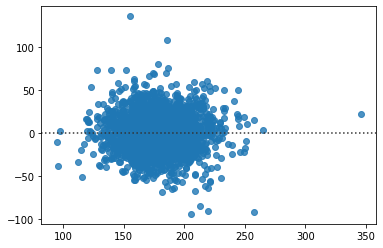

In [57]:
sns.residplot(predictions, y) # residplot plots the residuals for us
plt.show()

Residuals appear random which is a good thing

In [80]:
def avg_error(predictions, y): #error because accuracy doesnt work

    average_error = []
    for i in range(len(predictions)):
        error = abs(predictions[i] - y[i]) / y[i]
        average_error.append(error)

    total = 0
    for i in range(len(average_error)):
        total += average_error[i]

    avg_error = total/len(average_error)

    return avg_error

normal = avg_error(predictions, y)   
normal

0.08529028706146428

I had to create an average error because the data is continuous.  So, I could not use the accuracy funtion, as that is only used for comparing the accuracy of classifications.  You can think about the problem as now trying to minimize the average error, or maximize 1 - average error which would be accuracy.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
model = linear_model.LinearRegression() # create linear regression model
model.fit(X_train,y_train) # fit results onto linear regression
y_pred  = model.predict(X_test) # get predictions on test data
y_pred # see what predictions look like

array([189.64341249, 149.21860898, 177.43527281, 198.02636147,
       188.11551319, 162.61028442, 172.50191071, 182.0047418 ,
       169.84336392, 162.93542198, 213.98799034, 184.57889481,
       170.87990793, 159.79157982, 186.73623821, 172.3395777 ,
       205.70949801, 187.96482627, 215.0728032 , 153.86604722,
       184.46118041, 194.03344   , 189.75985925, 156.10278732,
       184.18535459, 145.54036513, 179.01646753, 180.2766354 ,
       241.39281464, 164.52990357, 155.58039172, 188.24125988,
       177.3590572 , 196.55025587, 193.21919138, 183.5797775 ,
       182.6712229 , 174.23358013, 184.34363945, 203.81230055,
       159.87323626, 158.51129282, 186.54068209, 159.36312037,
       152.86822061, 173.13057531, 225.95373252, 185.78565321,
       171.06633877, 172.56480635, 179.60557829, 189.91254764,
       193.89752436, 170.87645215, 157.17953627, 185.33713403,
       200.88585563, 203.28858904, 170.51389912, 188.78521825,
       175.05237859, 168.57155655, 165.54188337, 171.91

In [83]:
split = avg_error(y_pred,y_test)
split

0.08659755270281407

In [162]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 1) # split into 5 folds
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # get training and test data

acc_list = []
for train_ix, test_ix in kfold.split(X_train): # for each train and test fold
    X_train_k, X_test_k = X_train[train_ix], X_train[test_ix] # split training dataset into training fold and test fold
    y_train_k, y_test_k = y_train[train_ix], y_train[test_ix]
    model = linear_model.LinearRegression() # create linear regression model
    model.fit(X_train_k,y_train_k) # fit model on training fold
    y_pred = model.predict(X_test_k) # get predictions from test fold
    error = avg_error(y_pred, y_test_k)# get error
    acc_list.append(error) # add error to list
print('Error of each fold:')
print(acc_list) # error of each fold
print('Avg Error of Model:')
print(np.mean(acc_list)) # get mean of error

Error of each fold:
[0.08536925137872799, 0.08961496070823748, 0.08449346568742575, 0.08411814500404713, 0.08026844721521438]
Avg Error of Model:
0.08477285399873055


So, out of all the models the 5-fold linear regression minimized error, which is good.  We now have the best model for predicting cancer mortalities within communitites.

# Other Take-Aways

In [168]:
df = pd.read_csv("cancer_data_update.csv", index_col = 0)
top_percent = df.loc[df['TARGET_deathRate'] > 195] #top 25% of Mortality rate
top_percent

,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
avgAnnCount,,,,,,,,,,,,,,,,,,,,,
499.000000,215,206.1,463.100000,56737,111901,13.2,89.364706,"(54545.6, 61494.5]",38.4,38.0,...,NaN,49.7,33.1,17.3,87.801221,7.333247,1.052206,0.905964,51.523505,4.872468
152.000000,70,236.7,501.800000,37625,23372,22.1,0.000000,"(37413.8, 40362.7]",41.9,41.2,...,42.8,41.3,46.3,25.4,98.312500,0.675000,0.091667,0.129167,53.063790,4.220288
80.000000,40,196.3,396.600000,33817,14415,22.2,0.000000,"[22640, 34218.1]",44.5,43.7,...,41.9,38.9,43.4,25.4,97.912346,0.497719,0.000000,0.000000,53.272695,5.469020
50.000000,25,226.5,459.900000,32162,7470,21.8,0.000000,"[22640, 34218.1]",47.0,47.6,...,36.5,35.1,46.0,25.2,98.253275,0.092629,0.052931,0.026466,53.333333,4.780115
70.000000,26,212.9,591.000000,32961,8910,25.1,4938.271605,"[22640, 34218.1]",43.3,43.4,...,33.7,32.6,52.0,32.5,98.041790,0.000000,0.000000,0.043759,58.092486,8.753056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962.667684,7,209.6,453.549422,45353,1843,11.4,0.000000,"(45201, 48021.6]",45.7,43.8,...,52.7,43.9,32.2,9.2,97.960199,0.000000,0.547264,0.995025,57.780612,4.664723
1962.667684,13,214.7,453.549422,41434,2932,13.9,0.000000,"(40362.7, 42724.4]",52.3,51.9,...,45.5,35.6,40.0,16.1,96.523236,0.413081,0.000000,0.413081,42.701969,7.127430
1962.667684,9,208.3,453.549422,49256,2968,10.5,673.854447,"(48021.6, 51046.4]",45.2,45.2,...,51.9,39.4,30.6,15.5,93.781344,0.902708,0.300903,3.443664,55.965463,4.210526


In [89]:
top_percent.describe()

,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,768.000000,768.000000,768.000000,768.000000,7.680000e+02,768.000000,768.000000,768.000000,768.000000,768.000000,...,621.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,94.401042,213.666146,471.413072,39571.231771,3.887663e+04,21.083984,96.932793,44.733203,39.522005,42.261458,...,42.470853,36.442318,40.733724,23.204687,79.420312,13.963250,0.602439,1.170431,48.935023,5.540142
std,225.842893,17.620982,55.420851,7951.348351,1.061402e+05,6.510092,396.104620,41.055172,4.465849,4.385813,...,8.186155,7.627988,6.860464,5.906113,20.923867,19.084363,1.517865,2.173088,6.924237,1.995982
min,3.000000,195.100000,201.300000,22640.000000,8.270000e+02,6.200000,0.000000,23.300000,22.800000,24.500000,...,15.700000,13.500000,11.200000,5.700000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,32.000000,201.400000,444.425000,34417.000000,1.105500e+04,17.000000,0.000000,38.600000,36.975000,40.200000,...,37.000000,31.200000,36.575000,19.600000,67.630084,0.828519,0.140075,0.164847,45.609282,4.389423
50%,54.500000,209.350000,471.100000,38468.000000,2.057700e+04,20.250000,0.000000,40.900000,39.600000,42.400000,...,42.200000,36.300000,40.800000,23.050000,88.543240,3.911507,0.376243,0.523612,50.145524,5.330951
75%,95.000000,219.875000,500.425000,43308.750000,3.705825e+04,24.425000,0.000000,43.125000,41.800000,44.600000,...,47.600000,41.325000,45.300000,26.525000,95.771079,22.812088,0.655727,1.254875,53.287854,6.500448
max,3927.000000,362.800000,1206.900000,79358.000000,1.759335e+06,47.400000,4938.271605,536.400000,54.300000,59.600000,...,69.200000,65.100000,59.300000,43.300000,100.000000,85.947799,37.156932,23.666253,67.927171,17.877095


In [178]:
places = top_percent['Geography'].array

def top_states(places):
    location = []
    for i in range(len(places)):
        loc = places[i].split(',')
        location.append(loc)

    state = {}
    for i in range(len(location)):
        if location[i][1] not in state:
            state[location[i][1]] = 1
        else:
            state[location[i][1]] += 1

    return state   

state_dict = top_states(places)
state_dict

{' West Virginia': 29,
 ' Wisconsin': 8,
 ' Nebraska': 5,
 ' Nevada': 5,
 ' New Mexico': 1,
 ' Virginia': 37,
 ' Michigan': 13,
 ' North Carolina': 13,
 ' North Dakota': 8,
 ' Alabama': 26,
 ' Arkansas': 45,
 ' Montana': 7,
 ' Tennessee': 57,
 ' Texas': 34,
 ' Louisiana': 38,
 ' Maine': 2,
 ' Maryland': 4,
 ' Vermont': 1,
 ' Colorado': 2,
 ' Wyoming': 2,
 ' Mississippi': 47,
 ' Missouri': 48,
 ' Kansas': 13,
 ' Kentucky': 92,
 ' Florida': 16,
 ' Oklahoma': 38,
 ' Oregon': 3,
 ' Ohio': 26,
 ' Pennsylvania': 5,
 ' South Carolina': 16,
 ' New York': 1,
 ' Indiana': 32,
 ' Iowa': 4,
 ' Georgia': 49,
 ' Idaho': 2,
 ' Illinois': 23,
 ' Minnesota': 1,
 ' Alaska': 8,
 ' Arizona': 1,
 ' South Dakota': 6}

In [179]:
tippity_top_percent = top_percent.loc[top_percent['TARGET_deathRate'] > 219]

In [125]:
places = tippity_top_percent['Geography'].array
top_states(places)

{' West Virginia': 8,
 ' Nevada': 2,
 ' New Mexico': 1,
 ' Virginia': 9,
 ' North Carolina': 1,
 ' North Dakota': 3,
 ' Arkansas': 13,
 ' Nebraska': 1,
 ' Tennessee': 17,
 ' Texas': 2,
 ' Louisiana': 11,
 ' Maryland': 1,
 ' Wisconsin': 1,
 ' Mississippi': 19,
 ' Missouri': 12,
 ' Kansas': 3,
 ' Kentucky': 48,
 ' Florida': 3,
 ' Oklahoma': 11,
 ' Ohio': 1,
 ' Montana': 1,
 ' Indiana': 5,
 ' Georgia': 11,
 ' Idaho': 2,
 ' Alabama': 3,
 ' Alaska': 2,
 ' South Carolina': 4,
 ' South Dakota': 3,
 ' Illinois': 3}

In [180]:
names = list(state_dict.keys())
values = list(state_dict.values())


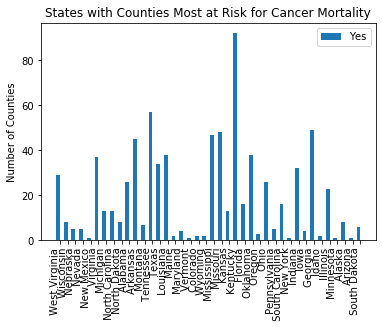

In [181]:
N = 40

ind = np.arange(N) 
width = .5       
plt.bar(ind, values, width, label='Yes')


plt.ylabel('Number of Counties')
plt.title('States with Counties Most at Risk for Cancer Mortality')

plt.xticks(ind + width /2, names)
plt.legend(loc='best')
plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

Seeing some of these values it is clear that a few states have a lot of counties in the top 25% of all counties.  I am going to investigate this a little more and see what I can conclude.  Below is a box and whisker plot to better get a feel for the data

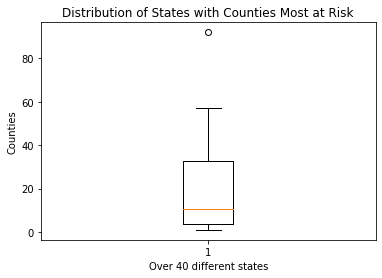

In [164]:
fig, ax = plt.subplots()
ax.set_title('Distribution of States with Counties Most at Risk')
ax.set_ylabel('Counties')
ax.set_xlabel('Over 40 different states')
ax.boxplot(values)

plt.show()

In [136]:
bad_states = []
for i in names:
    if state_dict[i] > 40:
        bad_states.append(i)

In [137]:
bad_states #states above 40 counties -> 2/3 of total counties 

[' Arkansas',
 ' Tennessee',
 ' Mississippi',
 ' Missouri',
 ' Kentucky',
 ' Georgia']

In [149]:
for i in bad_states:
    print(i, state_dict[i])

 Arkansas 45
 Tennessee 57
 Mississippi 47
 Missouri 48
 Kentucky 92
 Georgia 49


In [147]:
(45+57+47+48+92+49) * 213 #counties * avg mortality rate in top 25%

71994

71994 is the expected death toll from cancer in these communities alone, and this is all in the south. This is not even all the counties in each state.  

In [171]:
top_50 = df.loc[df['TARGET_deathRate'] > 178] #top 50% of highest Mortality rates 
top = top_states(top_50['Geography'].array)
top

{' Washington': 10,
 ' West Virginia': 44,
 ' Wisconsin': 22,
 ' Nebraska': 15,
 ' Nevada': 9,
 ' New Hampshire': 2,
 ' New Jersey': 6,
 ' New Mexico': 4,
 ' New York': 21,
 ' Virginia': 73,
 ' Michigan': 45,
 ' Minnesota': 10,
 ' North Carolina': 55,
 ' North Dakota': 10,
 ' Alabama': 52,
 ' Arkansas': 62,
 ' California': 7,
 ' Montana': 12,
 ' Tennessee': 82,
 ' Texas': 105,
 ' Louisiana': 55,
 ' Maine': 9,
 ' Maryland': 11,
 ' Utah': 1,
 ' Vermont': 5,
 ' Colorado': 4,
 ' Massachusetts': 2,
 ' Wyoming': 5,
 ' Mississippi': 67,
 ' Missouri': 78,
 ' Kansas': 27,
 ' Kentucky': 111,
 ' Delaware': 1,
 ' District of Columbia': 1,
 ' Florida': 32,
 ' Oklahoma': 58,
 ' Oregon': 12,
 ' Ohio': 66,
 ' Pennsylvania': 32,
 ' Rhode Island': 1,
 ' South Carolina': 31,
 ' Indiana': 65,
 ' Iowa': 26,
 ' Georgia': 90,
 ' Idaho': 7,
 ' Illinois': 57,
 ' Alaska': 12,
 ' Arizona': 1,
 ' South Dakota': 14}

In [184]:
names_top = list(top.keys())
values_top = list(top.values())
bad = []
for i in names_top:
    if top[i] > 40:
        bad.append(i)


for i in bad_states:
   print(i, top[i])

 West Virginia 44
 Virginia 73
 Michigan 45
 North Carolina 55
 Alabama 52
 Arkansas 62
 Tennessee 82
 Texas 105
 Louisiana 55
 Mississippi 67
 Missouri 78
 Kentucky 111
 Oklahoma 58
 Ohio 66
 Indiana 65
 Georgia 90
 Illinois 57


# Deliverables to the company

Based on the available data we were able to make some significant conclusions that will directly help your company.  First lest start with the regression model that we were able to develop.

## Linear Regression Model

In [155]:
model = sm.OLS(y, X).fit() # this is saying to fit an ordinary least squares model to the data
model.summary() # output statistics

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          1.582e+04
Date:                Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                        19:11:38   Log-Likelihood:                         -13400.
No. Observations:                3047   AIC:                                  2.683e+04
Df Residuals:                    3031   BIC:                                  2.693e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0100      0.004      2.804      0.005       0.003       0.017
x2             0.1996      0.007     28.935      0.000       0.186       0.213
x3             0.0002   7.09e-05      3.482      0.001       0.000       0.000
x4         -1.665e-05   5.41e-06     -3.076      0.002   -2.73e-05   -6.03e-06
x5             1.5060      0.119     12.701      0.000       1.274       1.739
x6             3.1380      0.930      3.376      0.001       1.315       4.961
x7             0.8021      0.125      6.398      0.000       0.556       1.048
x8             0.3097      0.047      6.658      0.000       0.219       0.401
x9             0.5038      0.084      5.980      0.000       0.339       0.669
x10           -0.9520      0.127     -7.475      0.000      -1.202      -0.702
x11            0.5863      0.156      3.765      0.000       0.281       0.892
x12            0.3427      0.069      4.949      0.000       0.207       0.478
x13            0.5190      0.119      4.359      0.000       0.286       0.753
x14           -0.5500      0.116     -4.758      0.000      -0.777      -0.323
x15           -0.7273      0.133     -5.460      0.000      -0.988      -0.466
x16           -0.6107      0.186     -3.282      0.001      -0.976      -0.246
==============================================================================
Omnibus:                      179.136   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              684.371
Skew:                           0.147   Prob(JB):                    2.46e-149
Kurtosis:                       5.303   Cond. No.                     9.00e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This chart above is very important for a couple of reasons.  One, and most important to you is that with the data our model explains 98% of the deviation within the Mean Mortality Rate.  Which is what we were trying to predict within our regression.  Secondly, on a more technical side the other numbers back up our findings and we have been able to isolate a few key predictors in determining the Mean Mortality Rate due to cancer.  If anyone is curious about the factors I have included them below, just as a side peice of info.  
          

'avgDeathsPerYear','incidenceRate','medIncome','popEst2015','povertyPercent','AvgHouseholdSize',
'PercentMarried','PctHS18_24','PctHS25_Over','PctBachDeg25_Over','PctUnemployed16_Over',
'PctEmpPrivCoverage','PctPublicCoverageAlone','PctOtherRace','PctMarriedHouseholds','BirthRate'

In [161]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 1) # split into 5 folds
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # get training and test data

acc_list = []
for train_ix, test_ix in kfold.split(X_train): # for each train and test fold
    X_train_k, X_test_k = X_train[train_ix], X_train[test_ix] # split training dataset into training fold and test fold
    y_train_k, y_test_k = y_train[train_ix], y_train[test_ix]
    model = linear_model.LinearRegression() # create linear regression model
    model.fit(X_train_k,y_train_k) # fit model on training fold
    y_pred = model.predict(X_test_k) # get predictions from test fold
    error = avg_error(y_pred, y_test_k)# get error
    acc_list.append(error) # add accuracy to list
print('Error of each fold:')
print(acc_list) # accuracy of each fold
print('Avg Error of Model:')
print(np.mean(acc_list)) # get mean of accuracy

Error of each fold:
[0.08536925137872799, 0.08961496070823748, 0.08449346568742575, 0.08411814500404713, 0.08026844721521438]
Avg Error of Model:
0.08477285399873055


The improtant take away here is that the model is 92% accurate and the to be honest the 8% of error in this case is not too disconcerning.  In reality that error on average only amounts to being off 15 people out of 100,000.  In other words, any random county has a Mortality Rate between 163 and 193 people out of 100,00 people.  

## Distribution Focus

Now, getting into where to maximize your efforts for distributing the drug.  The chart below has a distribution of states that hold counties that are 25% highest Mortality rate.  40 different states have at least 2 or more counties in the top 25%.  However, if we look at the states that have over 40 counties there is for sure a location to start in. 

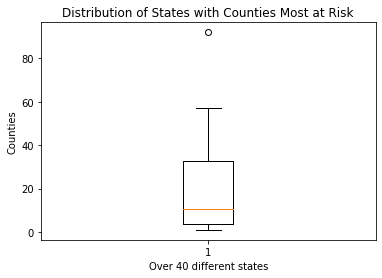

In [165]:
fig, ax = plt.subplots()
ax.set_title('Distribution of States with Counties Most at Risk')
ax.set_ylabel('Counties')
ax.set_xlabel('Over 40 different states')
ax.boxplot(values)

plt.show()

In [166]:
for i in bad_states:
    print(i, state_dict[i])

 Arkansas 45
 Tennessee 57
 Mississippi 47
 Missouri 48
 Kentucky 92
 Georgia 49


The South! On average any state has 60 counties, meaning over 2/3 of these counties are in the highest Mortality rate.  Additionally, based on just the numbers of these states/counties it is expected  that 71,994 have passed away due to cancer/ year.  So, this is a good place to start with distribution.  If you bring the threshold down a bit then you are still looking at mainly the south except for a few exceptions

In [185]:
for i in bad_states:
   print(i, top[i])

 West Virginia 44
 Virginia 73
 Michigan 45
 North Carolina 55
 Alabama 52
 Arkansas 62
 Tennessee 82
 Texas 105
 Louisiana 55
 Mississippi 67
 Missouri 78
 Kentucky 111
 Oklahoma 58
 Ohio 66
 Indiana 65
 Georgia 90
 Illinois 57


## Conclusion

If the first southern region is too large to service, you can focus your efforts on Kentucky.  If you have distribution capabilities that are slightly larger then the first mentioned region pretty much the entire south can use help.  Noting that in any situation, there is a region to focus on as the distribution is scaled up. Adittionally, the model we have provided is 92% accurate at predicting the true value of the Mean Mortaility Rate due to cancer for any given region in the future.  Best of luck to you in the future and we will be here if you require any further assistance.